## This file creates the final model
### Gaoyuan Huang
### Jiaxi Peng
### Zheheng Mao

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import math
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import gensim 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, PorterStemmer 
import string
import spacy
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix,make_scorer
from math import sqrt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
import  matplotlib.pyplot  as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [2]:
test_df =  pd.read_csv('../input/575-all-features/features_testing.csv')
train_df = pd.read_csv('../input/575-all-features/features_training.csv')

In [3]:
if True:
    train_df.drop(["cos_sim"], inplace=True, axis = 1)
    test_df.drop(["cos_sim"], inplace=True, axis = 1)


In [4]:
train_df.head()

,cos_description_tfidf,cos_title_tfidf,cos_attribute_tfidf,word_in_brand,ratio_brand,sim_in_title,sim_in_description,len_of_query,cos_description_stemmed,cos_title_stemmed,cos_attribute_stemmed,num_in_description_no common number,num_in_title_no common number,num_in_attribute_no common number,word_in_title,word_in_description,word_in_attribute,ratio_title,ratio_description,ratio_attribute,jc_title,jc_description,jc_attribute,relevance
0,0.181655,0.408386,0.108474,0,0.0,0.541130,0.514757,2,0.148522,0.408248,0.081111,0,0,0,1,1,1,0.500000,0.500000,0.500000,0.200000,0.000000,0.000000,3.00
1,0.000000,0.000000,0.000000,0,0.0,0.389561,0.411949,2,0.000000,0.000000,0.000000,0,0,0,1,1,1,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,2.50
2,0.000000,0.000000,0.000000,2,0.5,0.584328,0.690979,2,0.112906,0.000000,0.080845,0,0,0,1,1,2,0.500000,0.500000,1.000000,0.000000,0.008264,0.000000,3.00
3,0.068423,0.577868,0.100501,0,0.0,0.646968,0.659753,3,0.041451,0.166667,0.096225,0,0,0,1,1,2,0.333333,0.333333,0.666667,0.066667,0.012346,0.024390,2.33
4,0.079600,0.267189,0.187175,0,0.0,0.792618,0.645468,3,0.124354,0.500000,0.144338,0,0,0,3,3,3,1.000000,1.000000,1.000000,0.230769,0.037975,0.037037,2.67


In [5]:
x_train = train_df.iloc[:,:-1].values
y_train = train_df.iloc[:,-1:].values
x_test = test_df[:].values


In [6]:
random_st = 1024
x_tr, x_te, y_tr, y_te = train_test_split(x_train, y_train, random_state = random_st)

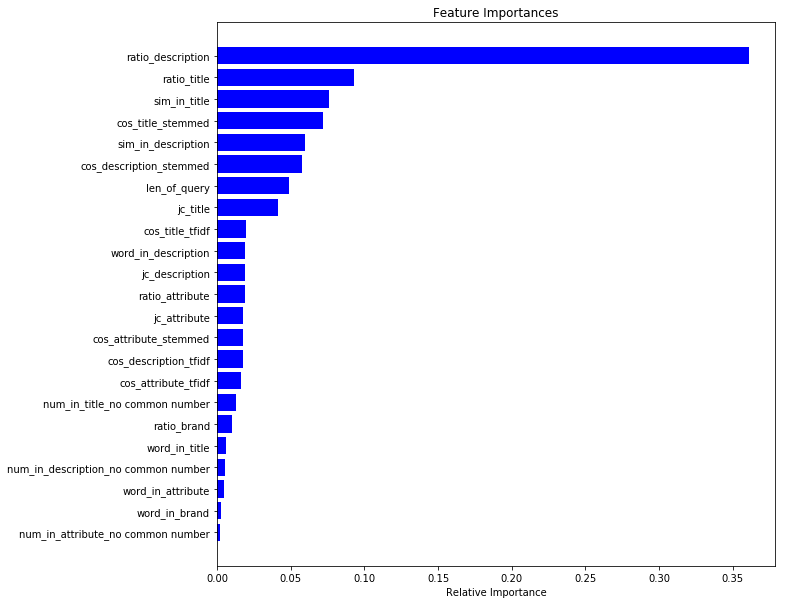

In [7]:
params = {'learning_rate': 0.02, 'max_depth': 7, 'min_samples_leaf': 9, 'n_estimators': 300}
model = GradientBoostingRegressor(max_features=0.8, min_samples_split = 5,subsample= 0.9, **params)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
features = train_df.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ts = pd.read_csv("../input/csc-575-final-project-kaggle-winter-2019/sample_submission_new.csv")

ts.relevance = y_pred

ts.to_csv("sub_reduced.csv",index = None)